In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from sklearn.cluster import DBSCAN
%matplotlib inline

In [2]:
df=pd.read_json("/content/drive/MyDrive/Machine learning algorithms/livedata.json")
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [4]:
BBox=(df.longitude.min(),df.longitude.max(),df.latitude.min(),df.latitude.max())
BBox

(77.5533811, 77.7054541, 13.0102837, 13.2496455)

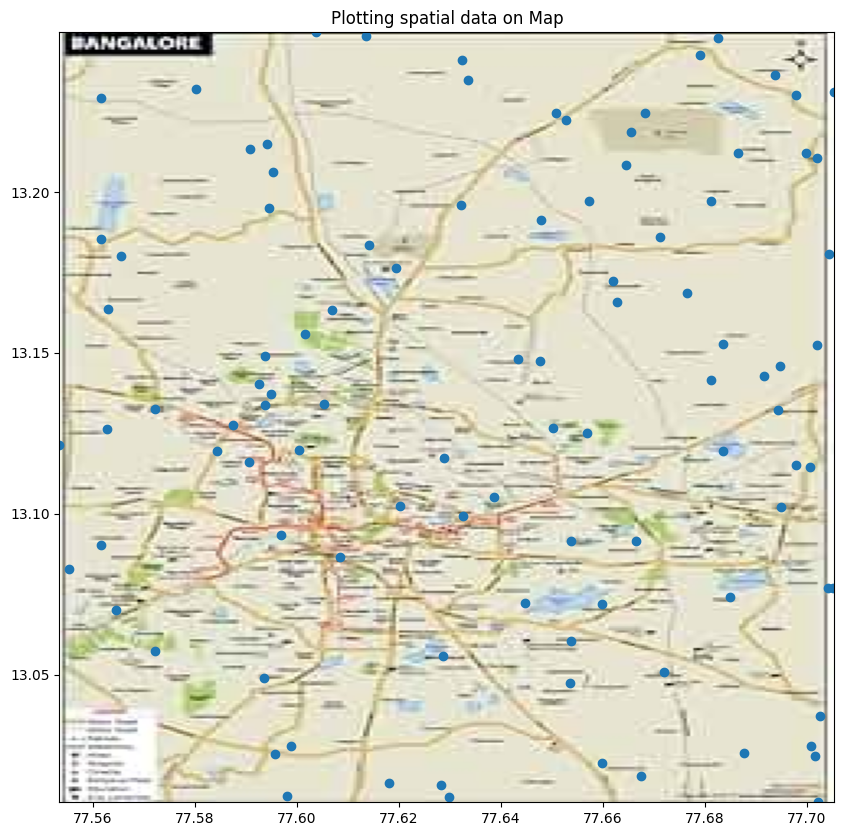

In [6]:
bangalore_m=plt.imread("/content/drive/MyDrive/Machine learning algorithms/map.jpg")
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(df.longitude,df.latitude)
ax.set_title("Plotting spatial data on Map")
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(bangalore_m,zorder=0,extent=BBox,aspect="auto")
plt.show()

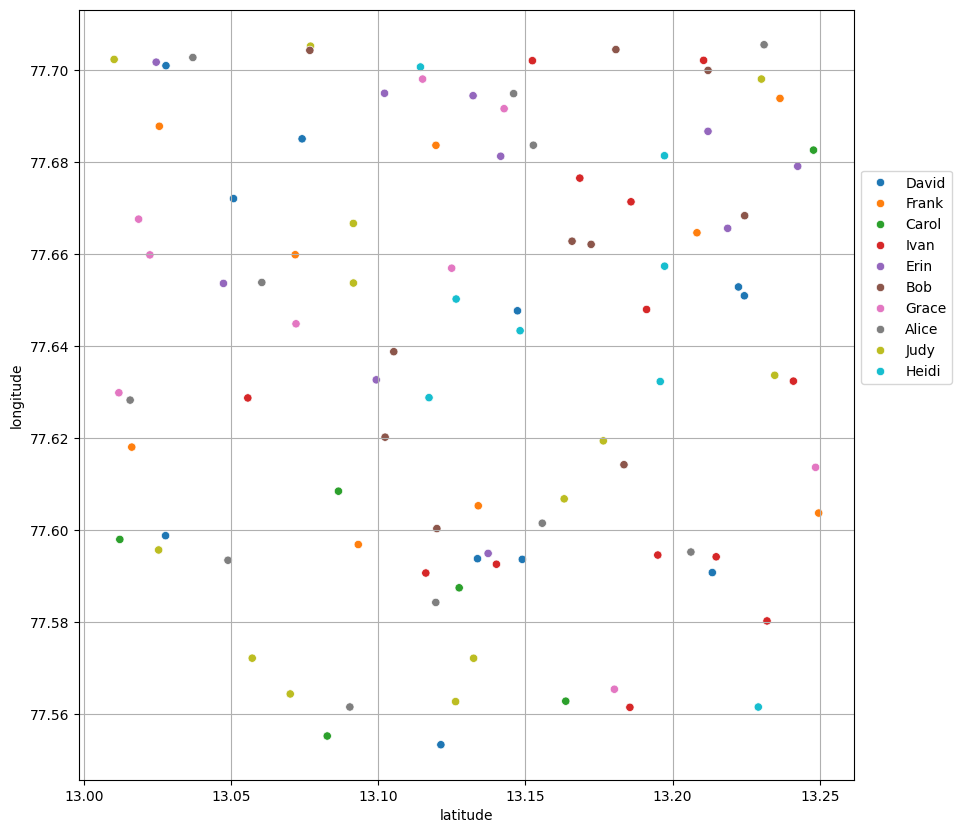

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='latitude',y='longitude',data=df,hue='id')
plt.legend(bbox_to_anchor=[1,0.8])
plt.grid()

In [8]:
a=df[df.id=='Ivan']
a.head()

,id,timestamp,latitude,longitude
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
16,Ivan,2020-07-04 20:35:30,13.241058,77.632370
18,Ivan,2020-07-04 12:35:30,13.194985,77.594589
20,Ivan,2020-07-04 21:35:30,13.055701,77.628720
22,Ivan,2020-07-04 13:35:30,13.168495,77.676476


In [10]:
def generateBaseMap(default_location,default_zoom_start=12):
  base_map=folium.Map(location=default_location,control_scale=True,zoom_start=default_zoom_start)
  return base_map

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.2+ KB


In [12]:
df.duplicated().value_counts()

,count
False,100


In [13]:
df=df.drop_duplicates()

In [14]:
df.isnull().sum()

,0
id,0
timestamp,0
latitude,0
longitude,0


In [15]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')
df['Hour']=df['timestamp'].apply(lambda x:x.hour+1)
df.head()

,id,timestamp,latitude,longitude,Hour
0,David,2020-07-04 15:35:30,13.148953,77.593651,16
1,David,2020-07-04 16:35:30,13.222397,77.652828,17
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,15
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,22
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,23


In [17]:
df2=pd.DataFrame(df.groupby(['Hour','id'])['timestamp'].max())
df2.reset_index(inplace=True)
df2.head()


,Hour,id,timestamp
0,13,Alice,2020-07-04 12:35:30
1,13,David,2020-07-04 12:35:30
2,13,Frank,2020-07-04 12:35:30
3,13,Grace,2020-07-04 12:35:30
4,13,Ivan,2020-07-04 12:35:30


In [19]:
df3=pd.merge(df2,df,left_on=['Hour','id','timestamp'],right_on=['Hour','id','timestamp'])
df3.head()

,Hour,id,timestamp,latitude,longitude
0,13,Alice,2020-07-04 12:35:30,13.155742,77.601504
1,13,David,2020-07-04 12:35:30,13.027759,77.598796
2,13,David,2020-07-04 12:35:30,13.133737,77.593794
3,13,David,2020-07-04 12:35:30,13.074142,77.685008
4,13,Frank,2020-07-04 12:35:30,13.208293,77.664607


In [21]:
lat_long_list = []
for i in range(1,25):
    temp=[]
    for index, instance in df3[df3['Hour'] == i].iterrows():
        temp.append([instance['latitude'],instance['longitude']])
    lat_long_list.append(temp)

In [22]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [23]:
!pip install folium

In [24]:
import folium
from folium.plugins import HeatMapWithTime
fig7=Figure(width=850,height=550)
m=folium.Map(location=[13.12,77.8],zoom_start=10)
HeatMapWithTime(lat_long_list,radius=15,auto_play=True,position='bottomright').add_to(m)
m